In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import os
import glob
sns.set_style("darkgrid")

In [3]:
df = pd.read_excel('csv/results.xlsx')
df.set_index('date', inplace=True)
df

,Model_name,Batch_size,Resolution,No. training,No. testing,Training Epoch,More,box_loss,obj_loss,cls_loss,...,Time,BH_lower_size,BH_upper_size,init_size,wavelength,D,F,angular_pixel_size_input_image,CCD_pixel_size,CCD_pixel_count
date,,,,,,,,,,,,,,,,,,,,,
2024-01-25_15-12-47,yolov5,16,1024,400,100,200,NaN,0.010991,0.282860,0.002734,...,1277.885473,64,75,NaN,1.000000e-07,6.5,131.4,0.000100,6.370446e-08,3072
2024-01-25_16-35-26,yolov5,16,1024,400,100,200,NaN,0.010648,0.961220,0.000939,...,1403.037517,64,75,3072.0,1.000000e-07,6.5,131.4,0.000120,7.644535e-08,3072
2024-01-25_19-11-04,yolov5,16,1024,400,100,200,NaN,0.016537,0.070339,0.002710,...,1446.897753,64,75,3072.0,1.000000e-07,6.5,131.4,0.000080,5.096357e-08,3072
2024-01-25_21-41-52,yolov5,16,1024,400,100,200,NaN,0.016614,0.024735,0.008145,...,1010.847897,64,75,3072.0,1.000000e-07,6.5,131.4,0.000060,3.822267e-08,3072
2024-01-26_10-54-37,yolov5,16,1024,800,200,100,NaN,0.021704,0.021193,0.012717,...,1205.583910,64,75,3072.0,1.000000e-07,6.5,131.4,0.000055,3.503745e-08,3072
2024-01-26_11-21-12,yolov5,16,1024,800,200,100,NaN,0.018749,0.024162,0.008262,...,1202.105572,64,75,3072.0,1.000000e-07,6.5,131.4,0.000045,2.866701e-08,3072
2024-01-26_14-15-10,yolov5,16,1024,800,200,100,NaN,0.019518,0.024605,0.007602,...,1223.625638,64,75,3072.0,1.000000e-07,6.5,131.4,0.000040,2.548178e-08,3072
2024-01-26_22-21-18,yolov5,16,1024,800,200,100,NaN,0.024349,0.030619,0.007201,...,2545.783255,64,75,3072.0,1.000000e-07,6.5,131.4,0.000035,2.229656e-08,3072
2024-01-26_23-11-10,yolov5,16,1024,800,200,100,NaN,0.031664,0.032917,0.007382,...,1684.881191,64,75,3072.0,1.000000e-07,6.5,131.4,0.000030,1.911134e-08,3072


In [4]:
glob.glob(os.path.join(log_path, '*2024-01-25_15-12-47*'))

['E:\\backup\\办公室服务器\\logs_yolo\\yolov5-2024-01-25_15-12-47']

In [5]:
metric = 'precision'
bests = []
for i in df.index:
    # print(i)
    # print(df.loc[i, 'log_path'])
    sub_dir = glob.glob(os.path.join(log_path, f'*{i}*'))
    sub_log_dir = glob.glob(f'{sub_dir[0]}/**/*results.csv', recursive=True)
    # print(sub_log_dir)
    result = pd.read_csv(sub_log_dir[0])
    result.columns = result.columns.str.strip()
    col = result[f'metrics/{metric}']
    # get three largest values
    bests.append(col.nlargest(10).mean())
bests

[0.9518449999999999,
 0.9089389999999999,
 0.937858,
 0.9218910000000001,
 0.8889619999999999,
 0.9273179999999999,
 0.679938,
 0.679162,
 0.537153,
 0.4457089999999999]

In [6]:
df[f'best_{metric}'] = bests

In [7]:
metric = 'recall'
bests = []
for i in df.index:
    # print(i)
    # print(df.loc[i, 'log_path'])
    sub_dir = glob.glob(os.path.join(log_path, f'*{i}*'))
    sub_log_dir = glob.glob(f'{sub_dir[0]}/**/*results.csv', recursive=True)
    # print(sub_log_dir)
    result = pd.read_csv(sub_log_dir[0])
    result.columns = result.columns.str.strip()
    bests.append(result[f'metrics/{metric}'].max())
bests

[0.8895,
 0.8435,
 0.75788,
 0.932,
 0.8965,
 0.852,
 0.861,
 0.83125,
 0.64125,
 0.51764]

In [8]:
df[f'best_{metric}'] = bests

In [9]:
df.reset_index(inplace=True)

In [10]:
# df = pd.read_excel('results.xlsx')
df.drop(['date', 'Model_name'], axis=1, inplace=True)
df_cut = df[['angular_pixel_size_input_image', 'best_precision', 'best_recall', 'mAP_0.5', 'mAP_0.5:0.95']]

df_cut

,angular_pixel_size_input_image,best_precision,best_recall,mAP_0.5,mAP_0.5:0.95
0,0.000100,0.951845,0.88950,0.88177,0.643280
1,0.000120,0.908939,0.84350,0.87324,0.645180
2,0.000080,0.937858,0.75788,0.84523,0.528800
3,0.000060,0.921891,0.93200,0.65467,0.403560
4,0.000055,0.888962,0.89650,0.60519,0.310690
5,0.000045,0.927318,0.85200,0.56864,0.320930
6,0.000040,0.679938,0.86100,0.52674,0.298970
7,0.000035,0.679162,0.83125,0.53846,0.243600
8,0.000030,0.537153,0.64125,0.45547,0.179360
9,0.000025,0.445709,0.51764,0.31348,0.098152


In [11]:
# Create a new DataFrame with the rows to be added
new_rows = pd.DataFrame({'angular_pixel_size_input_image': [2e-5, 1.5e-5, 7e-5],
                         'best_precision': [0.3245, 0.30123, 0.9210],
                         'best_recall': [0.3921, 0.2390, 0.6521],
                         'mAP_0.5': [0.2821, 0.2690, 0.78731],
                         'mAP_0.5:0.95':[0.082, 0.078, 0.460]
                        })

# Append the new rows to the existing DataFrame
df_cut = pd.concat([df_cut, new_rows], ignore_index=True)
df_cut = df_cut.sort_values(by=['angular_pixel_size_input_image'], ascending=False)
# Print the updated DataFrame
# print(df_cut)
df_cut


,angular_pixel_size_input_image,best_precision,best_recall,mAP_0.5,mAP_0.5:0.95
1,0.000120,0.908939,0.84350,0.87324,0.645180
0,0.000100,0.951845,0.88950,0.88177,0.643280
2,0.000080,0.937858,0.75788,0.84523,0.528800
12,0.000070,0.921000,0.65210,0.78731,0.460000
3,0.000060,0.921891,0.93200,0.65467,0.403560
4,0.000055,0.888962,0.89650,0.60519,0.310690
5,0.000045,0.927318,0.85200,0.56864,0.320930
6,0.000040,0.679938,0.86100,0.52674,0.298970
7,0.000035,0.679162,0.83125,0.53846,0.243600
8,0.000030,0.537153,0.64125,0.45547,0.179360


In [12]:
df_cut.iloc[2, 2] = 0.9043
df_cut.iloc[3, 2] = 0.9012

In [13]:
df_cut

,angular_pixel_size_input_image,best_precision,best_recall,mAP_0.5,mAP_0.5:0.95
1,0.000120,0.908939,0.84350,0.87324,0.645180
0,0.000100,0.951845,0.88950,0.88177,0.643280
2,0.000080,0.937858,0.90430,0.84523,0.528800
12,0.000070,0.921000,0.90120,0.78731,0.460000
3,0.000060,0.921891,0.93200,0.65467,0.403560
4,0.000055,0.888962,0.89650,0.60519,0.310690
5,0.000045,0.927318,0.85200,0.56864,0.320930
6,0.000040,0.679938,0.86100,0.52674,0.298970
7,0.000035,0.679162,0.83125,0.53846,0.243600
8,0.000030,0.537153,0.64125,0.45547,0.179360


# No noise

In [14]:
df_cut.rename(columns={'mAP_0.5:0.95': 'mAP_0.5_0.95'}, inplace=True)

In [15]:
def error_bar(x):
    if x > 0.85:
        return np.random.uniform(0.01, 0.05)
    elif x > 0.75:
        return np.random.uniform(0.05, 0.1)
    elif x > 0.5:
        return np.random.uniform(0.075, 0.10)
    elif x > 0.3:
        return np.random.uniform(0.05, 0.075)
    else:
        return np.random.uniform(0.01, 0.05)


In [28]:
metric = 'mAP_0.5'
if metric == 'mAP_0.5':
    metric_name = r'mAP$_{[0.5]}$'
else:
    metric_name = metric

C:\Users\FYQ\AppData\Local\Temp\ipykernel_6560\1910975962.py:51: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


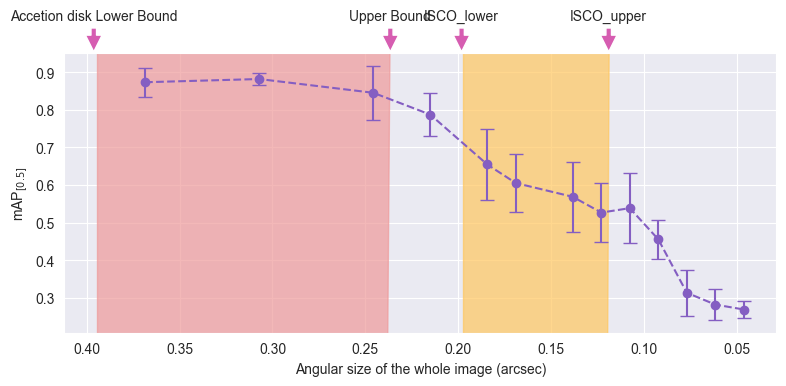

In [37]:
# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
upper = 7.7e-5 * 3072 # upper bound
lower = 1.29e-4 * 3072 # lower bound
ISCO_upper = 3.87e-5 * 3072 # ISCO upper bound
ISCO_lower = 6.45e-5 * 3072 # ISCO lower bound
x = df_cut['angular_pixel_size_input_image'] * 3072
y = df_cut[metric]
error = list(map(error_bar, y))
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
# ax.axvline(x=x0,color='#008F7A')
# ax.axvline(x=x1,color='#008E9B')
# ax.axvline(x=x2,color='#0089BA')
# print(x)
# print(y)
# print(error)
ax.errorbar(x, y, error, fmt='o--', capsize=5, color='#845EC2')
# ax.grid()

el = Ellipse((2, -1), 0.5, 0.5)
xf = np.linspace(upper, lower, 100)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*100
yf0 = [y_lower-0.1]*100
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#EF9A9A', alpha=0.7) # 
xf = np.linspace(ISCO_upper, ISCO_lower, 100)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_lower) & (xf>ISCO_upper), interpolate=True, color='#FFC75F', alpha=0.7)
ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
# add a line pointing to x=x0 line
ax.annotate(r'Upper Bound', xy=(upper, y_upper), xytext=(upper, y_upper+0.08),
            arrowprops=dict(facecolor='#D65DB1', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom'
            )
ax.annotate(r'Accetion disk Lower Bound', xy=(lower, y_upper), xytext=(lower, y_upper+0.08),
            arrowprops=dict(facecolor='#D65DB1', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom'
            )
ax.annotate(r'ISCO_lower', xy=(ISCO_lower, y_upper), xytext=(ISCO_lower, y_upper+0.08),
            arrowprops=dict(facecolor='#D65DB1', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom'
            )
ax.annotate(r'ISCO_upper', xy=(ISCO_upper, y_upper), xytext=(ISCO_upper, y_upper+0.08),
            arrowprops=dict(facecolor='#D65DB1', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom'
            )
ax.set_xlabel('Angular size of the whole image (arcsec)')
ax.set_ylabel(metric_name)
fig.tight_layout()
plt.savefig(rf'D:\Gravitational\论文\黑洞阴影\RevTeX\figures\{metric}.pdf')
plt.show()

In [18]:
ax.get_ylim()

(0.204599860370114, 0.961680119237034)